In [143]:
import numpy as np 
import pandas as pd


In [144]:
dict1 = {
    "lenght" : [12,13,14,154,12.34,123,543,213],
    "hight" : [432,543,654,6.54,654,54,54,43],
    "wirth" : [534,3.45,543,98,987,45,56,98]
}
df = pd.DataFrame(dict1)

In [145]:
df

,lenght,hight,wirth
0,12.00,432.00,534.00
1,13.00,543.00,3.45
2,14.00,654.00,543.00
3,154.00,6.54,98.00
4,12.34,654.00,987.00
5,123.00,54.00,45.00
6,543.00,54.00,56.00
7,213.00,43.00,98.00


In [146]:
import csv

In [147]:
df = pd.read_csv('insurance.csv')

In [148]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [150]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

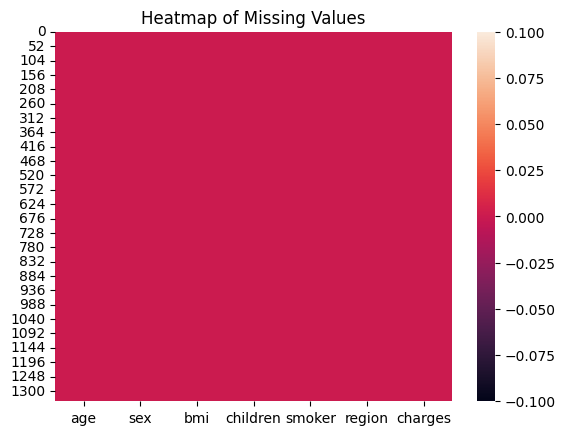

In [152]:
sns.heatmap(df.isnull(),cbar=True)
plt.title('Heatmap of Missing Values')
plt.show()

In [153]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
ctagorical_cols = df.select_dtypes(include=['object']).columns

In [154]:
numerical_col 

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

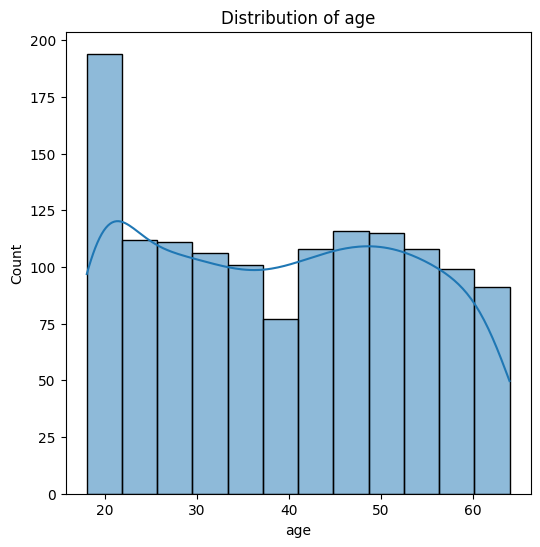

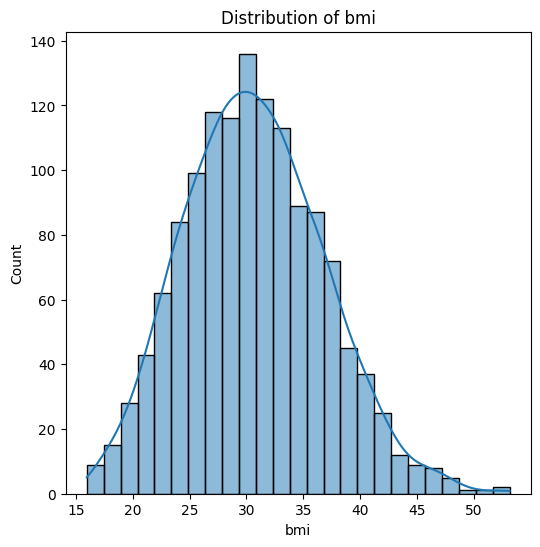

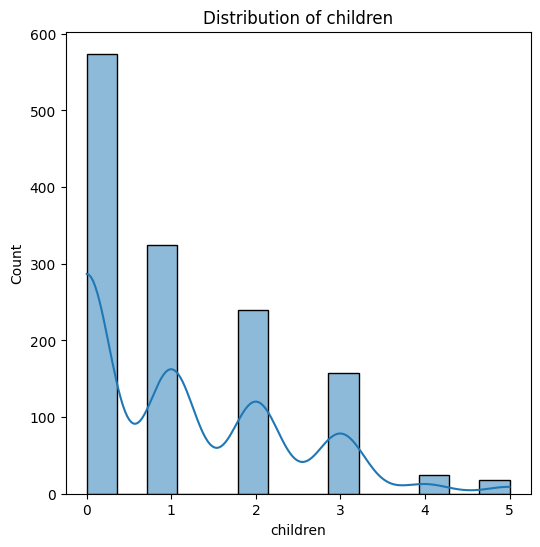

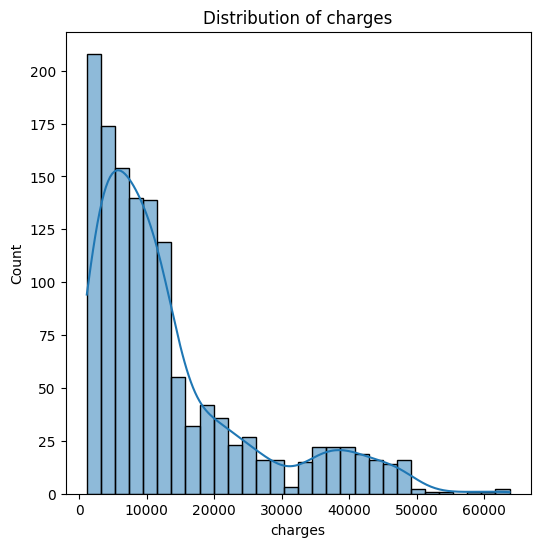

In [155]:
for col in numerical_col:
    plt.figure(figsize=(6, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

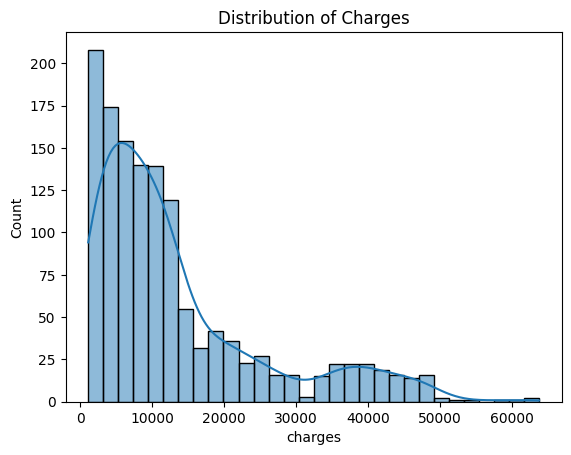

In [156]:
sns.histplot(df['charges'],kde=True)
plt.title('Distribution of Charges')
plt.show()

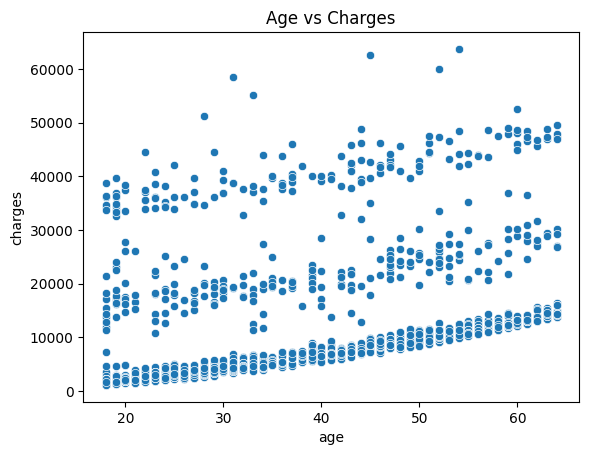

In [157]:
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Charges')
plt.show()

Text(0.5, 1.0, 'BMI vs Charges')

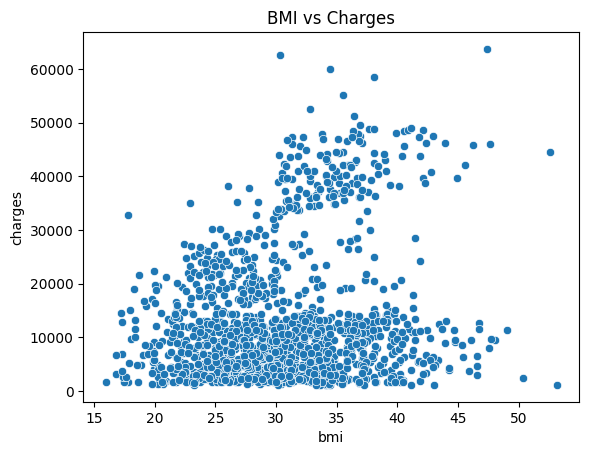

In [158]:
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')

Text(0.5, 1.0, 'children vs Charges')

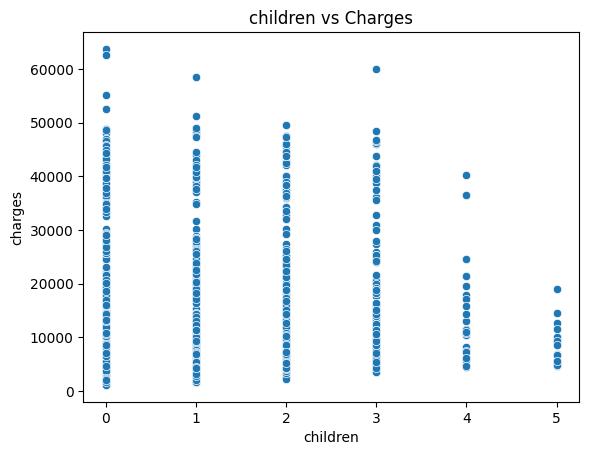

In [159]:
sns.scatterplot(x='children', y='charges', data=df)
plt.title('children vs Charges')

In [160]:
df.isnull().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [161]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
for col in ctagorical_cols:
    df[col] = lr.fit_transform(df[col])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [162]:
corr = df.corr()
corr['charges'].sort_values()
pd.DataFrame(corr['charges'].sort_values())

,charges
region,-0.006208
sex,0.057292
children,0.067998
bmi,0.198341
age,0.299008
smoker,0.787251
charges,1.000000


In [163]:
df['region'] = df['sex'] + df['children'] * df['region']

In [164]:
df = df[['bmi', 'region','age','smoker','charges']]

In [165]:
df

,bmi,region,age,smoker,charges
0,27.900,0,19,1,16884.92400
1,33.770,3,18,0,1725.55230
2,33.000,7,28,0,4449.46200
3,22.705,1,33,0,21984.47061
4,28.880,1,32,0,3866.85520
...,...,...,...,...,...
1333,30.970,4,50,0,10600.54830
1334,31.920,0,18,0,2205.98080
1335,36.850,0,18,0,1629.83350
1336,25.800,0,21,0,2007.94500


In [166]:
x = df.drop('charges',axis = 1)
y =df['charges']

In [167]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [168]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [169]:
lr.coef_


array([3.26236812e+02, 5.97372292e+00, 2.59359381e+02, 2.36745925e+04])

In [170]:
lr.intercept_

np.float64(-11712.077592611693)

c:\Users\hamza\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


c:\Users\hamza\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\hamza\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\hamza\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the 

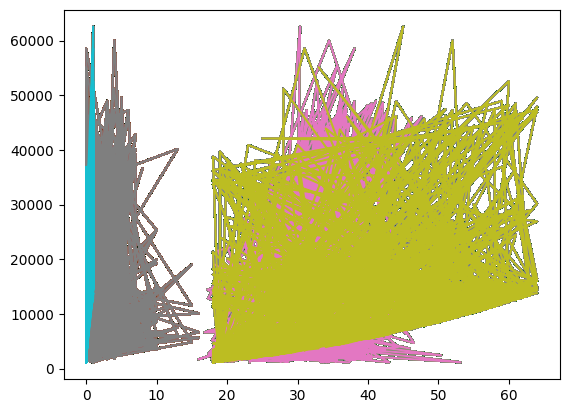

In [177]:
b = -100
m =3.26
lr = 0.01
epochs = 1000
for i in range(epochs):
   loss_slope = -2 * np.sum(y_train - m*x_train - b)
   b = b - lr * loss_slope
   y_pred = m * x_train + b
   plt.plot(x_train, y_train)


In [171]:
y_pred = lr.predict(x_test)

In [ ]:
y_test.values

array([ 9095.06825 ,  5272.1758  , 29330.98315 ,  9301.89355 ,
       33750.2918  ,  4536.259   ,  2117.33885 , 14210.53595 ,
        3732.6251  , 10264.4421  , 18259.216   ,  7256.7231  ,
        3947.4131  , 46151.1245  , 48673.5588  , 44202.6536  ,
        9800.8882  , 42969.8527  ,  8233.0975  , 21774.32215 ,
        5080.096   ,  7441.501   ,  1256.299   ,  2755.02095 ,
       11085.5868  , 10923.9332  , 12644.589   , 18804.7524  ,
        9715.841   ,  1131.5066  , 15828.82173 , 11842.62375 ,
        2020.5523  ,  5693.4305  ,  2904.088   ,  7448.40395 ,
        2597.779   ,  7337.748   , 23887.6627  , 38709.176   ,
        4687.797   ,  2643.2685  , 11674.13    , 12124.9924  ,
        4889.9995  , 12333.828   ,  3579.8287  ,  4391.652   ,
       42124.5153  ,  4463.2051  , 13887.204   ,  1719.4363  ,
       28476.73499 ,  1708.92575 , 10594.2257  , 25333.33284 ,
        3645.0894  , 38746.3551  , 11848.141   , 10564.8845  ,
       13880.949   ,  4753.6368  , 27941.28758 ,  8017.

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print('MSE =',mean_squared_error(y_test,y_pred))
print('MAE =',mean_absolute_error(y_test,y_pred))
print('R2 =',r2_score(y_test,y_pred))
print('RMSE =',np.sqrt(mean_squared_error(y_test,y_pred)))

MSE = 34505934.74084704
MAE = 4259.836735006724
R2 = 0.7777377347352079
RMSE = 5874.175239201419


In [ ]:
from sklearn.linear_model import Ridge,Lasso

In [ ]:
rid = Ridge(alpha =1.0)
rd = rid.fit(x_train,y_train)
y_pred_ridge = rid.predict(x_test)

In [ ]:
print('Ridge MSE =',mean_squared_error(y_test,y_pred_ridge))
print('Ridge MAE =',mean_absolute_error(y_test,y_pred_ridge))
print('Ridge r2 =',r2_score(y_test,y_pred_ridge))
print('Ridge RMSE =',np.sqrt(mean_squared_error(y_test,y_pred_ridge)))

Ridge MSE = 34540997.736928955
Ridge MAE = 4271.007393612992
Ridge r2 = 0.7775118842838387
Ridge RMSE = 5877.158985166979


In [ ]:
ls = Lasso(alpha =1.0)
ls.fit(x_train,y_train)
y_pred_lasso = ls.predict(x_test)
print('lasso MSE =',mean_squared_error(y_test,y_pred_lasso))

lasso MSE = 34507516.49671292


In [ ]:
x = df.drop('charges',axis = 1)
y =df['charges']